#**CREDIT CARD PREDICTION**

###**IMPORTS**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

###**CLEANING TRAIN DATA**

In [ ]:
#I have attached my drive nad imported files from there change the path before executing it 
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pawan_Gosavi/train.csv")
train

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [ ]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [ ]:
new_train = train.dropna( how ='any')
#new_train = train.fillna('Yes')
new_train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [ ]:
label = LabelEncoder()

In [ ]:
new_train['Credit_Product_new'] = label.fit_transform(new_train['Credit_Product'])
new_train = new_train.drop("Credit_Product", axis = "columns")

new_train['Is_Active_new'] = label.fit_transform(new_train['Is_Active'])
new_train = new_train.drop("Is_Active", axis = "columns")

new_train['Channel_Code_new'] = label.fit_transform(new_train['Channel_Code'])
new_train = new_train.drop("Channel_Code", axis = "columns")

new_train['Occupation_new'] = label.fit_transform(new_train['Occupation'])
new_train = new_train.drop("Occupation", axis = "columns")

new_train.head()

,ID,Gender,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Lead,Credit_Product_new,Is_Active_new,Channel_Code_new,Occupation_new
0,NNVBBKZB,Female,73,RG268,43,1045696,0,0,0,2,1
1,IDD62UNG,Female,30,RG277,32,581988,0,0,0,0,2
2,HD3DSEMC,Female,56,RG268,26,1484315,0,0,1,2,3
3,BF3NC7KV,Male,34,RG270,19,470454,0,0,0,0,2
4,TEASRWXV,Female,30,RG282,33,886787,0,0,0,0,2


In [ ]:
input_train = new_train.drop(columns=['ID','Gender','Age','Region_Code', 'Is_Lead'], axis =1)
input_train.head()

,Vintage,Avg_Account_Balance,Credit_Product_new,Is_Active_new,Channel_Code_new,Occupation_new
0,43,1045696,0,0,2,1
1,32,581988,0,0,0,2
2,26,1484315,0,1,2,3
3,19,470454,0,0,0,2
4,33,886787,0,0,0,2


In [ ]:
target = new_train['Is_Lead']
target

0         0
1         0
2         0
3         0
4         0
         ..
245719    0
245721    0
245722    0
245723    0
245724    0
Name: Is_Lead, Length: 216400, dtype: int64

###**CLEANING TEST DATA**

In [ ]:
#I have attached my drive nad imported files from there change the path before executing it
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pawan Gosavi/test.csv")
test

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes


In [ ]:
test.shape

(105312, 10)

In [ ]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [ ]:
#new_test = test.dropna( how ='any')
new_test = test.fillna('Yes')
new_test.head()
print(new_test.isnull().sum())

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64


In [ ]:
label1 = LabelEncoder()

In [ ]:
new_test['Credit_Product_new'] = label1.fit_transform(new_test['Credit_Product'])
new_test = new_test.drop("Credit_Product", axis = "columns")

new_test['Is_Active_new'] = label1.fit_transform(new_test['Is_Active'])
new_test = new_test.drop("Is_Active", axis = "columns")

new_test['Channel_Code_new'] = label1.fit_transform(new_test['Channel_Code'])
new_test = new_test.drop("Channel_Code", axis = "columns")

new_test['Occupation_new'] = label1.fit_transform(new_test['Occupation'])
new_test = new_test.drop("Occupation", axis = "columns")

new_test.head()

,ID,Gender,Age,Region_Code,Vintage,Avg_Account_Balance,Credit_Product_new,Is_Active_new,Channel_Code_new,Occupation_new
0,VBENBARO,Male,29,RG254,25,742366,1,0,0,1
1,CCMEWNKY,Male,43,RG268,49,925537,1,0,1,1
2,VK3KGA9M,Male,31,RG270,14,215949,0,0,0,2
3,TT8RPZVC,Male,29,RG272,33,868070,0,0,0,1
4,SHQZEYTZ,Female,29,RG270,19,657087,0,0,0,1


In [ ]:
input_test = new_test.drop(columns=['ID','Gender','Age','Region_Code'], axis =1)
input_test.head()

,Vintage,Avg_Account_Balance,Credit_Product_new,Is_Active_new,Channel_Code_new,Occupation_new
0,25,742366,1,0,0,1
1,49,925537,1,0,1,1
2,14,215949,0,0,0,2
3,33,868070,0,0,0,1
4,19,657087,0,0,0,1


###**CREATING MODEL**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input_train, target, test_size=0.3)

In [ ]:
model = LogisticRegression() 
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Checking Accuracy**

In [ ]:
acc = model.score(X_test, y_test)
print("Accuracy:", acc*100)

Accuracy: 84.7550831792976


**Predicting the values**

In [ ]:
prediction = model.predict(input_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

Text(33.0, 0.5, 'Truth')

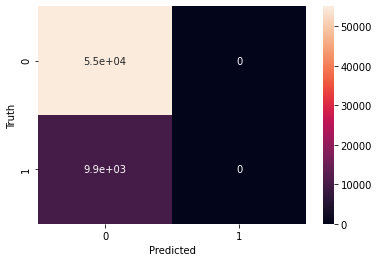

In [ ]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

###**SAMPLE SUBMISSION CSV**

In [ ]:
ID = new_test['ID']

In [ ]:
new_df = pd.DataFrame(data={'ID':ID, 'Is_Lead':prediction})
new_df

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
...,...,...
105307,DBENJOYI,0
105308,CWQ72DWS,0
105309,HDESC8GU,0
105310,2PW4SFCA,0


In [ ]:
new_df.to_csv('sample_submission.csv', index=False)

**Done!**

In [ ]:
new_df.shape

(105312, 2)